**Done By --> Abhishek M Kulkarni**

***Task 3 : SALES PREDICTION USING PYTHON***

In [49]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
# read the data
df = pd.read_csv('/content/Advertising.csv')

In [51]:
# Vizualize tables
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [52]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [53]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [55]:
# check for null values
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

As we can see there are no null values

In [56]:
df.duplicated().sum()

0

As we can see there are no duplicate values

In [57]:
df.drop(columns='Unnamed: 0')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Box plot Analysis

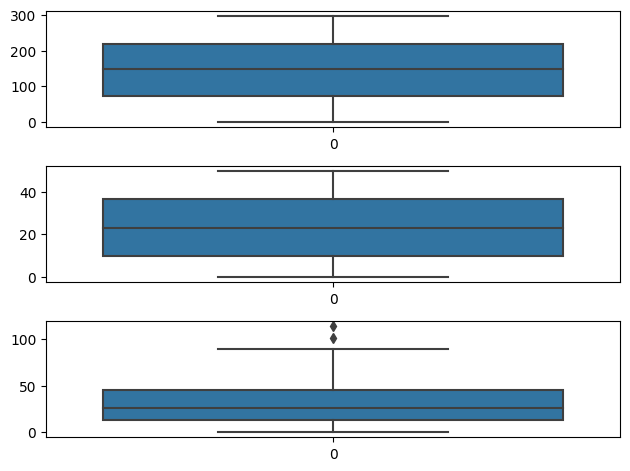

In [58]:
#Outlier Analysis
fig,axs = plt.subplots(3)
plt1 = sns.boxplot(df['TV'],ax = axs[0])
plt2 = sns.boxplot(df['Radio'],ax = axs[1])
plt3 = sns.boxplot(df['Newspaper'],ax = axs[2])
plt.tight_layout()


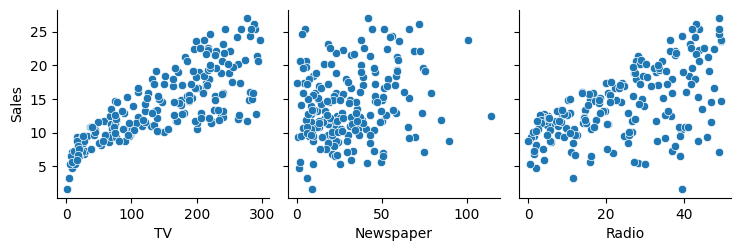

In [59]:
#Data Visualization
sns.pairplot(df,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',kind='scatter')
plt.show()

Above we did visualization of sales of different media sets

<Axes: >

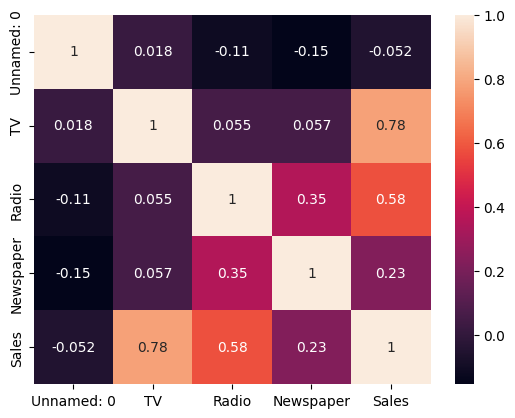

In [60]:
# Visualizing the heatmap
heat_map=df.corr()
round(heat_map,2)
sns.heatmap(heat_map,annot=True)

In [61]:
from sklearn.model_selection import train_test_split
# Split the feature in train and test
features = ['TV','Radio','Newspaper']
x = df[features]
y = df['Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

Fit in LinearRegression Model

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
Lin_reg = LinearRegression()
Lin_reg

LinearRegression()

In [64]:
Lin_reg.fit(x_train,y_train)

LinearRegression()

In [65]:
# Predict the values
y_pred = Lin_reg.predict(x_test)

In [66]:
y_pred

array([10.05094829,  7.45024493,  7.03275278, 24.20039113, 12.07717347,
        6.59515104, 13.10163135, 15.00806148, 11.03411659, 16.28366834,
       23.02906264,  9.15880971, 10.38072907, 15.40421336, 11.59963519,
       12.11757433, 18.61318934, 10.74323152, 16.0487818 , 17.23688108,
       24.29938882,  9.52224345, 15.17453643, 12.45240637,  5.72609176,
       15.19714126, 12.25915605, 20.91174918, 13.34916217,  9.18401362,
       13.40715795, 21.59349883, 18.18058661, 21.15271173,  6.74645348,
        6.17396095,  8.01987622, 13.19831262, 14.77943142,  6.25371161,
       12.30223133,  9.14280566, 15.03364665, 16.27567962, 17.24668844,
       13.29909071,  3.70096923, 12.48102981, 15.94129555,  8.75358577,
       10.66768954, 19.62612371, 18.42412795, 15.28903916, 10.01266375,
        8.19193968, 21.56883554, 14.1921378 , 16.35036777,  8.86157431,
       15.34670348, 12.36920583, 13.72628782, 14.18434042, 18.40381878,
       19.29862422])

In [67]:
from sklearn import metrics


In [68]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_pred,y_test))

Mean Absolute Error:  1.2027532428361676


In [69]:
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

Root Mean Squared Error: 1.8542204770071637


In [70]:
print('R-Squared: ',metrics.r2_score(y_pred,y_test))

R-Squared:  0.8486296366650649
